In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
run_ids = {                                              
    "default": "84ea2581-ccc7-4d18-a18e-69102153cfa0",                                                                  
    "gmean-residual-stdev": "2d0ee47b-81ca-4898-b2cf-1b6ffa2bb9e9",                                                     
    "ones": "9ec834aa-7c3a-4251-b00b-f60028783667",                                                                     
}

In [4]:
rmse = {
    experiment: xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/phase-1/loss-scaling/{experiment}/inference-validation/{rid}/rmse.nc", decode_timedelta=True)
    for experiment, rid in run_ids.items()
}

In [5]:
mae = {
    experiment: xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/phase-1/loss-scaling/{experiment}/inference-validation/{rid}/mae.nc", decode_timedelta=True)
    for experiment, rid in run_ids.items()
}

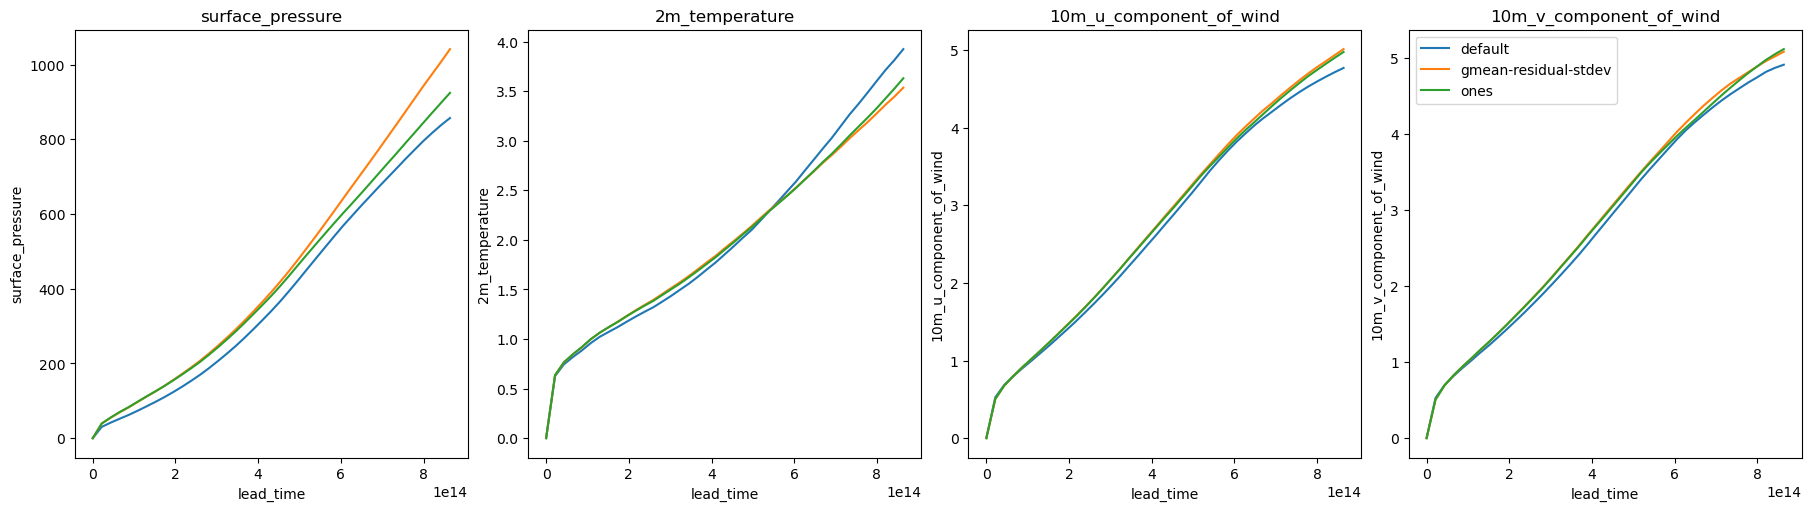

In [7]:
fig, axs = plt.subplots(1,4, figsize=(18, 5), constrained_layout=True)

for varname, ax in zip(
    ["surface_pressure", "2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind"],
    axs,
):
    for experiment, xds in rmse.items():
        xds[varname].plot(ax=ax, label=experiment)
    ax.set(title=varname)

ax.legend()

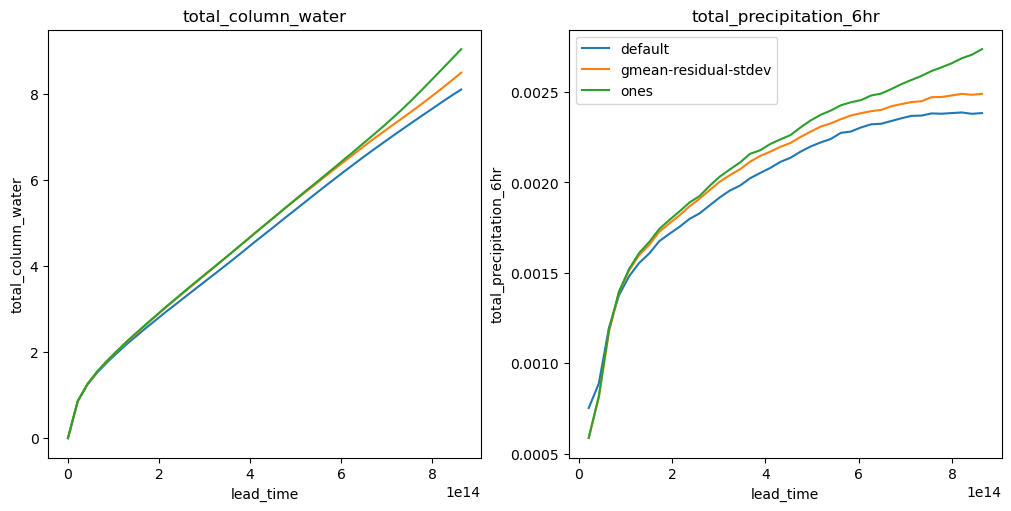

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

for varname, ax in zip(
    ["total_column_water", "total_precipitation_6hr"],
    axs,
):
    for experiment, xds in rmse.items():
        xds[varname].plot(ax=ax, label=experiment)
    ax.set(title=varname)

ax.legend()

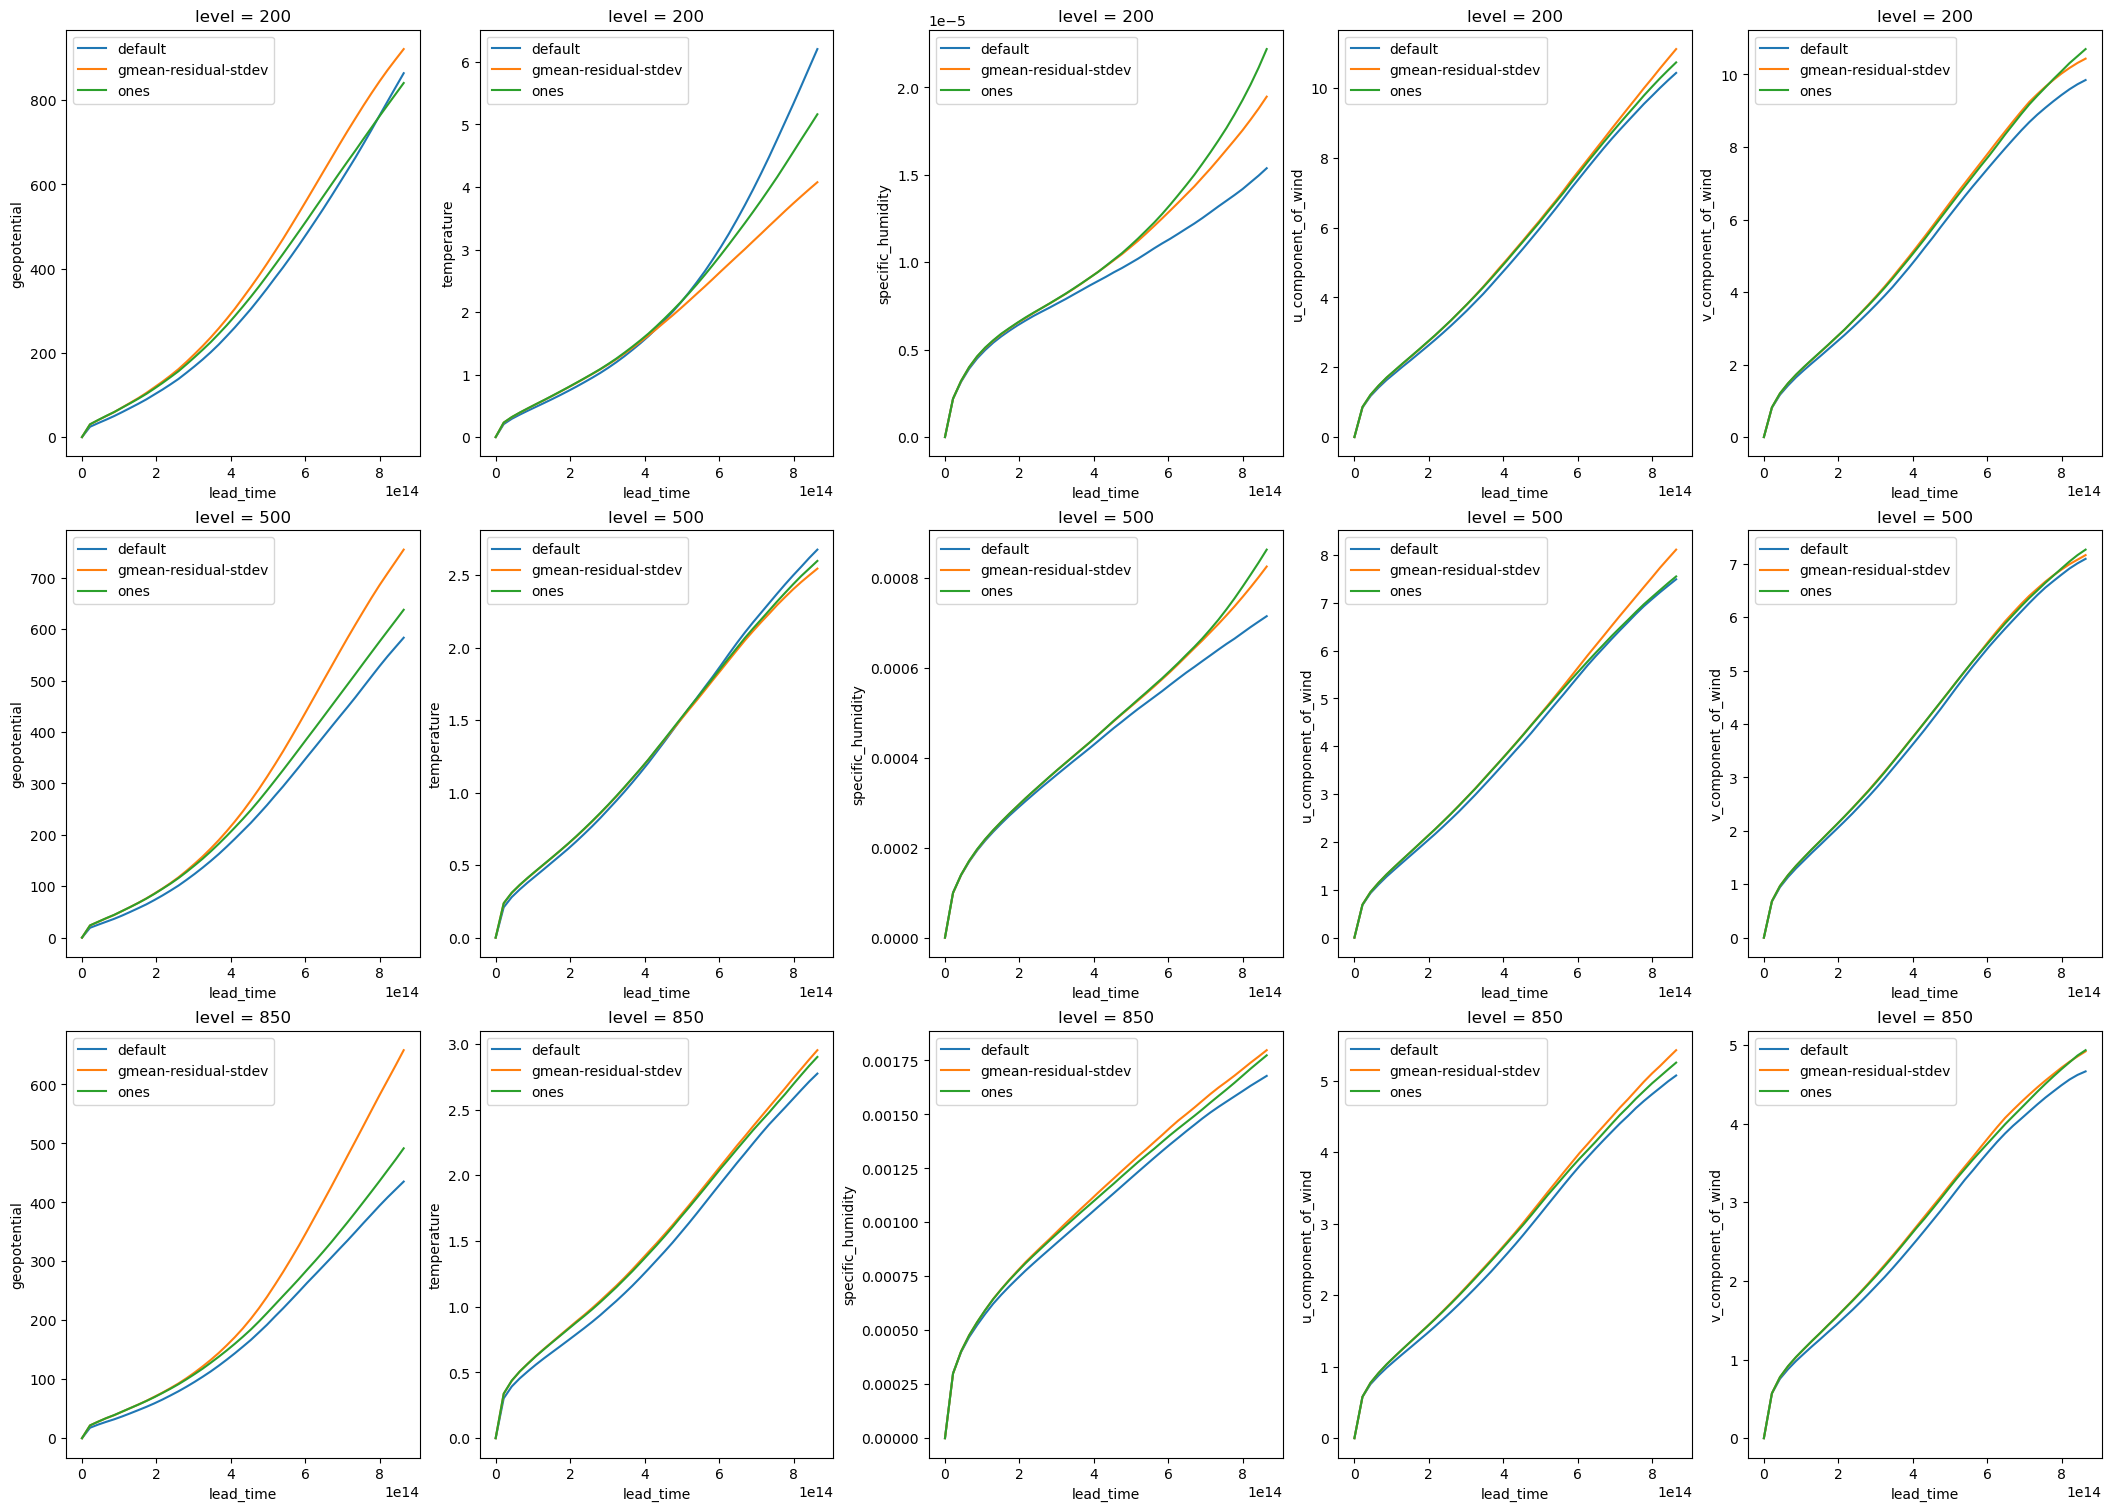

In [9]:
fig, axs = plt.subplots(3,5, figsize=(21, 15), constrained_layout=True)

for level, axr in zip(
    [200, 500, 850],
    axs,
):
    for varname, ax in zip(
        ["geopotential", "temperature", "specific_humidity", "u_component_of_wind", "v_component_of_wind"],
        axr,
    ):
        for experiment, xds in mae.items():
            xds[varname].sel(level=level).plot(ax=ax, label=experiment)
    
        ax.legend()